<a href="https://colab.research.google.com/github/Neena-A/Wat-Pneu/blob/main/Main_Project_Watermarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving IM-0005-0001.jpeg to IM-0005-0001.jpeg


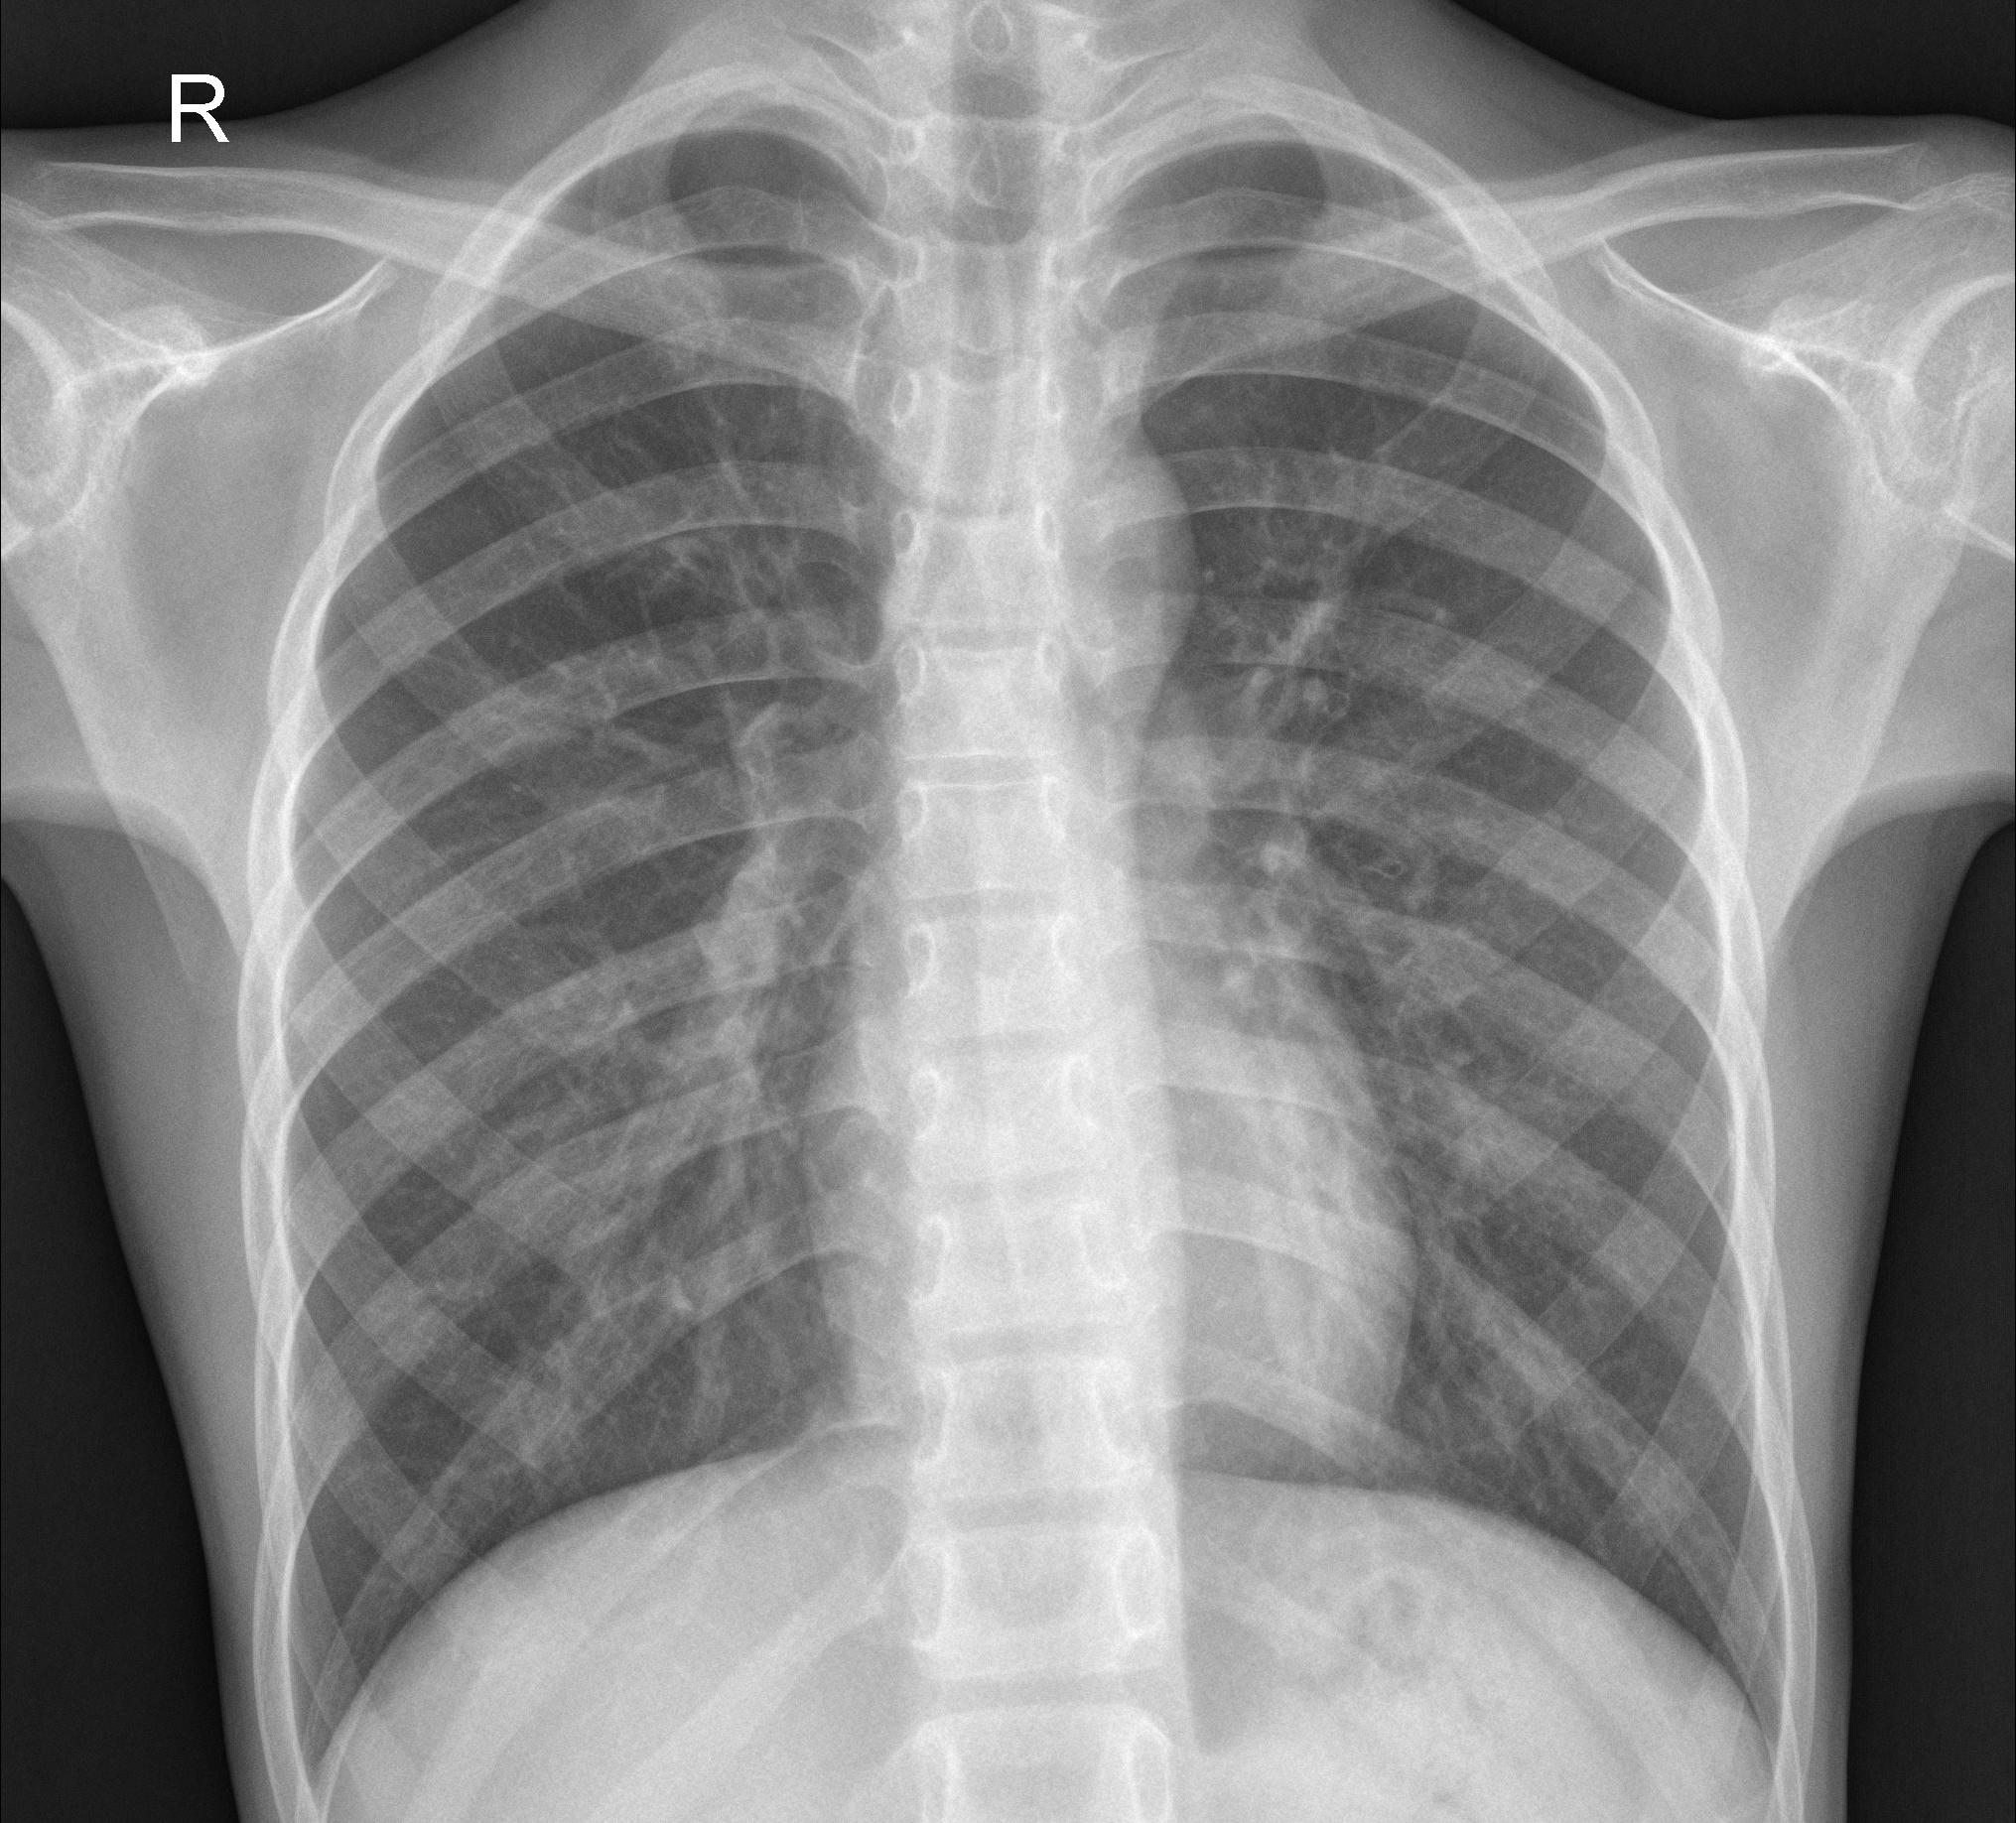

(1000, 1000, 3)


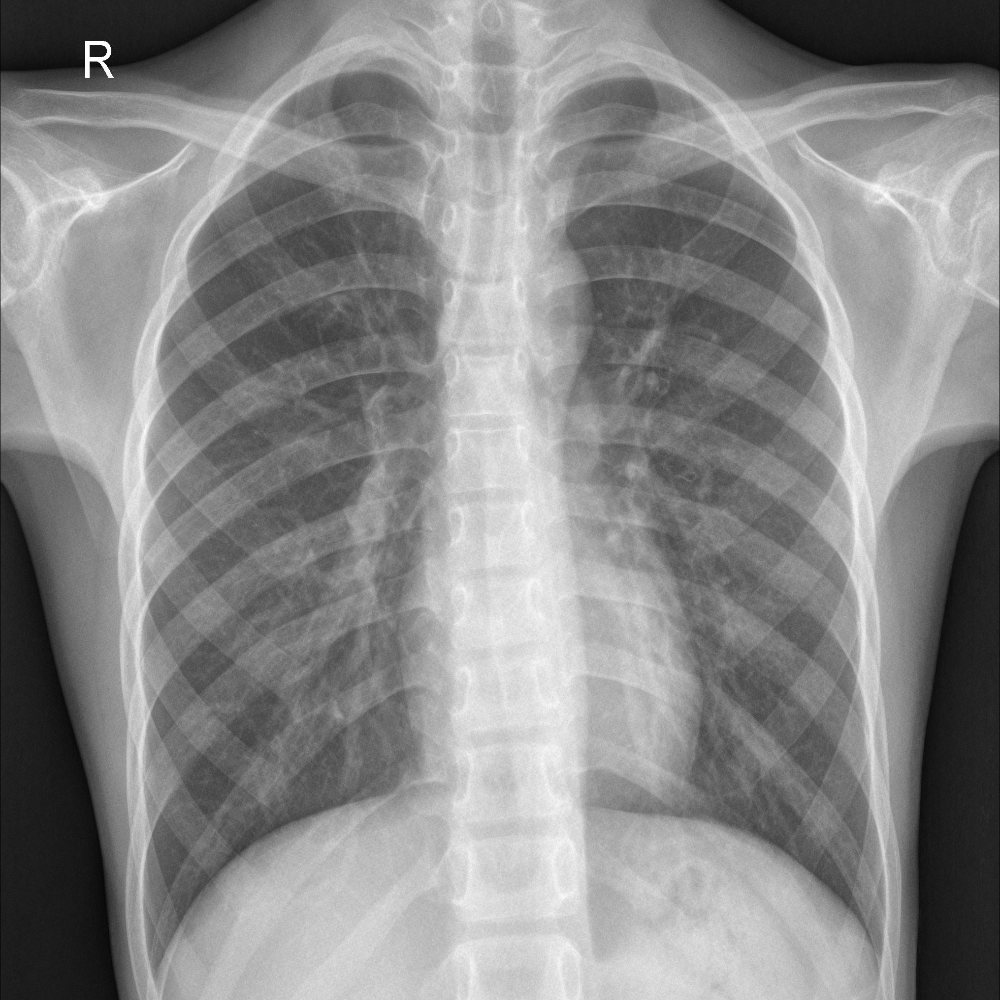

(1000, 1000)


In [3]:
# import opencv
from google.colab.patches import cv2_imshow
import cv2
 
# Load the input image
image = cv2.imread('/content/IM-0005-0001.jpeg')
cv2_imshow(image)
cv2.waitKey(0)

image = cv2.resize(image,(1000,1000))
print(image.shape)
# Use the cvtColor() function to grayscale the image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
cv2_imshow(gray_image)
print(gray_image.shape)
cv2.waitKey(0) 
 
# Window shown waits for any key pressing event
cv2.destroyAllWindows()

In [ ]:
gray_image


array([[14, 33, 34, ..., 31, 33, 15],
       [14, 32, 32, ..., 34, 34, 14],
       [15, 32, 32, ..., 35, 33, 14],
       ...,
       [12, 28, 30, ..., 34, 34, 15],
       [12, 28, 32, ..., 34, 34, 15],
       [12, 29, 33, ..., 35, 35, 15]], dtype=uint8)

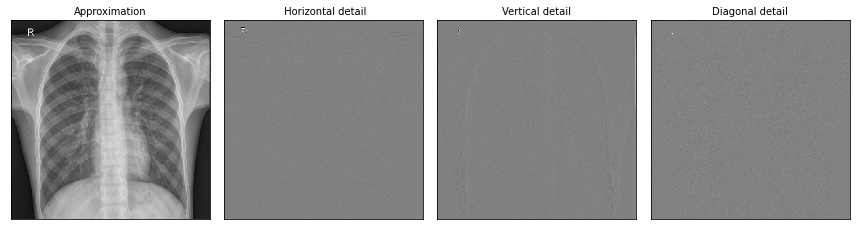

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = gray_image

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 13))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

code to do DWT

In [ ]:
LL

array([[57.9375   , 57.9375   , 77.625    , ..., 62.09375  , 46.8359375,
        46.8359375],
       [57.9375   , 57.9375   , 77.625    , ..., 62.09375  , 46.8359375,
        46.8359375],
       [56.8671875, 56.8671875, 78.9765625, ..., 60.7578125, 47.5078125,
        47.5078125],
       ...,
       [44.1328125, 44.1328125, 59.4375   , ..., 74.421875 , 51.5546875,
        51.5546875],
       [43.5859375, 43.5859375, 58.21875  , ..., 75.3515625, 49.1015625,
        49.1015625],
       [43.5859375, 43.5859375, 58.21875  , ..., 75.3515625, 49.1015625,
        49.1015625]])

In [ ]:

LL.shape

(502, 502)

In [5]:
def split(LL, nrows, ncols):

    r, h = LL.shape
    return(LL.reshape(h//nrows, nrows, -1, ncols)
                 .swapaxes(1, 2)
                 .reshape(-1, nrows, ncols))
A,B,C,D=split(LL,251,251)

In [6]:
from numpy import array
from scipy.linalg import svd
s=0
temp = []
U, s, VT = svd(A)

temp.append(s[0])
U, s, VT = svd(B)
temp.append(s[0])
U, s, VT = svd(C)
temp.append(s[0])
U, s, VT = svd(D)
temp.append(s[0])

SVD


In [ ]:
temp

[69557.62696183166, 70849.21011896277, 69718.53792549783, 76954.73208002407]

In [7]:
M=[]
for x in range(3):
  if temp[x]>=temp[x+1]:
    M.append(1)
  else:
    M.append(0)  
M

[0, 1, 0]

Binary Image

In [ ]:
!pip install aspose-words

import aspose.words as aw

from google.colab import files
text = files.upload()
doc = aw.Document("/content/text.txt (1).txt")
doc.save(f"Output.jpg")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
  
# read the image file
img = cv2.imread("/content/Output.jpg", 2)
  
ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
  
# converting to its binary form
bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
  
cv2_imshow( bw_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: ignored

In [ ]:
from PIL import Image
import numpy as np

img = bw_img

np_img = np.array(img)
np_img = ~np_img  # invert B&W
np_img[np_img > 0] = 1

In [ ]:
np_img^M

NameError: ignored